In [5]:
import numpy as np
import pandas as pd

In [9]:
df=pd.read_csv('https://raw.githubusercontent.com/campusx-official/placement-project-logistic-regression/refs/heads/main/placement.csv')

In [11]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [13]:
df.shape

(100, 4)

In [15]:
df=df.iloc[:,1:]

In [17]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


EDA

In [22]:
import matplotlib.pyplot as plt

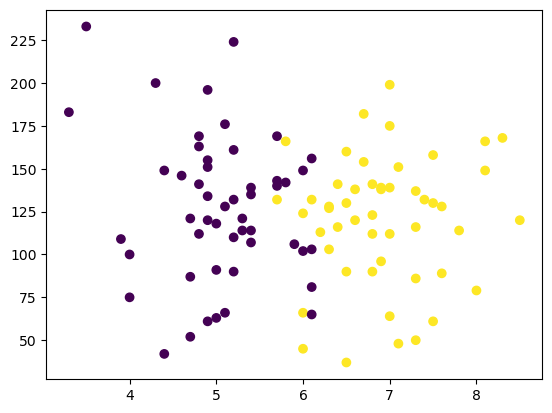

In [26]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

Feature Selection  x

Extract I/P and O/P Cols

In [30]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [32]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [34]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [38]:
Y.shape

(100,)

Train test split

In [49]:
from  sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [51]:
X_train

,cgpa,iq
13,6.4,116.0
95,4.3,200.0
54,6.4,141.0
77,7.3,50.0
60,6.9,139.0
...,...,...
73,4.9,61.0
67,5.0,118.0
92,5.2,110.0
58,8.0,79.0


In [53]:
Y_train

13    1
95    0
54    1
77    1
60    1
     ..
73    0
67    0
92    0
58    1
14    0
Name: placement, Length: 90, dtype: int64

In [55]:
X_test

,cgpa,iq
7,5.0,63.0
32,7.0,139.0
17,3.3,183.0
47,5.2,161.0
3,7.4,132.0
83,7.5,130.0
55,7.8,114.0
30,7.6,128.0
10,6.0,45.0
37,8.1,149.0


In [57]:
Y_test

7     0
32    1
17    0
47    0
3     1
83    1
55    1
30    1
10    1
37    1
Name: placement, dtype: int64

In [74]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler=StandardScaler()

In [78]:
X_train=scaler.fit_transform(X_train)

In [80]:
X_train

array([[ 0.43047148, -0.18848665],
       [-1.51591871,  1.92569593],
       [ 0.43047148,  0.44073436],
       [ 1.26463871, -1.8496301 ],
       [ 0.89389772,  0.39039668],
       [ 0.98658297, -0.28916201],
       [ 0.15241574,  0.2142148 ],
       [ 0.61584198,  0.36522784],
       [-0.21832525,  0.49107204],
       [ 1.4500092 ,  0.86860464],
       [ 1.54269445, -0.86804533],
       [ 0.70852722,  1.47265681],
       [ 0.33778623, -0.51568157],
       [-0.49638099, -0.23882433],
       [ 0.89389772,  0.36522784],
       [ 0.89389772, -0.69186345],
       [-0.49638099,  0.28972132],
       [-0.95980723,  1.82502057],
       [-0.68175149,  0.2142148 ],
       [ 0.52315673, -2.17682502],
       [ 0.05973049, -1.44692866],
       [-0.21832525,  1.14546188],
       [ 0.80121247, -0.84287649],
       [-0.86712198, -0.81770765],
       [ 0.33778623,  0.08837059],
       [-0.58906624, -0.23882433],
       [-0.77443673,  0.11353943],
       [ 0.24510099, -0.26399317],
       [ 2.37686167,

In [82]:
X_test=scaler.transform(X_test)

In [84]:
X_test

array([[-0.86712198, -1.52243518],
       [ 0.98658297,  0.39039668],
       [-2.44277118,  1.49782565],
       [-0.68175149,  0.94411116],
       [ 1.35732395,  0.2142148 ],
       [ 1.4500092 ,  0.16387712],
       [ 1.72806494, -0.23882433],
       [ 1.54269445,  0.11353943],
       [ 0.05973049, -1.9754743 ],
       [ 2.00612068,  0.64208508]])

Train the Model

In [87]:
from sklearn.linear_model import LogisticRegression

In [89]:
clf=LogisticRegression()

In [91]:
clf.fit(X_train,Y_train)

LogisticRegression()

Evaluate the Model

In [98]:
Y_prod=clf.predict(X_test)

In [96]:
Y_test

7     0
32    1
17    0
47    0
3     1
83    1
55    1
30    1
10    1
37    1
Name: placement, dtype: int64

In [102]:
from sklearn.metrics import accuracy_score

In [104]:
accuracy_score(Y_test,Y_prod)

0.9

In [115]:
!pip install mlxtend

In [116]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

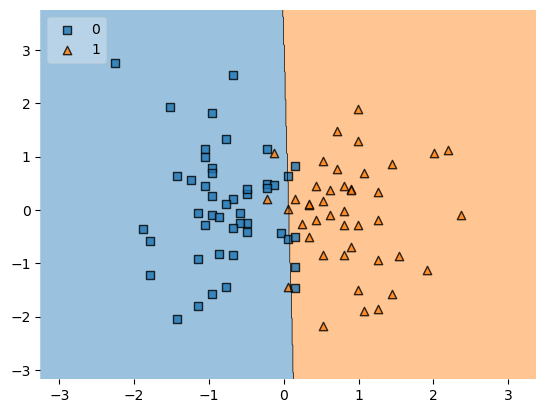

In [123]:
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)

In [125]:
import pickle

In [127]:
pickle.dump(clf,open('model.pkl','wb'))